# Persiapan

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from annoy import AnnoyIndex
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

In [2]:
# setup random seed

RANDOM_SEED = 24
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# 1. Data Preprocessing

In [3]:
df = pd.read_csv('/kaggle/input/heart-disease-dataset/heart.csv')

display(df.head(20))
display(df.describe())
display(df.info())

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


None

## 1.1 Mengatasi Data Kosong (*Missing Values*)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Berdasarkan pengamatan pada dataset yang ada, tidak ditemukan data yang kosong. Dengan demikian tidak diperlukan proses data imputation yang bertujuan untuk mengisi data kosong.

## 1.2 Membuat 1 Fitur Baru

In [5]:
# add new column [CholAge] (cholesterol * age)
df['chol_age'] = df['chol'] * df['age']

display(df['chol_age'].describe())
print('\n')
display(df['chol_age'].head(20))

count     1025.000000
mean     13493.590244
std       4017.462610
min       5916.000000
25%      10660.000000
50%      13053.000000
75%      15860.000000
max      37788.000000
Name: chol_age, dtype: float64

0     11024
1     10759
2     12180
3     12383
4     18228
5     14384
6     18444
7     15895
8     11454
9     15444
10    10579
11    14663
12     7140
13    15198
14    10608
15     7140
16    15708
17    14364
18    12200
19    12238
Name: chol_age, dtype: int64

## 1.3 Normalisasi / Standardisasi

In [6]:
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "chol_age"]

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# 2. Klusterisasi

## 2.1 k-Means

### 2.1.1 Menemukan nilai k terbaik

Untuk melakukan proses k-Means, perlu ditentukan nilai k yang paling terbaik. Metode yang bisa dilakukan adalah melalui **Elbow method** dan juga **Silhouette score**.

#### 2.1.1.1 Elbow method

k=1, inertia=10226.3785
k=2, inertia=8240.6847
k=3, inertia=7394.5221
k=4, inertia=6923.2949
k=5, inertia=6508.9218
k=6, inertia=6163.7421
k=7, inertia=5889.9304
k=8, inertia=5722.2563
k=9, inertia=5482.7010
k=10, inertia=5331.9870
k=11, inertia=5149.5627
k=12, inertia=5031.2539
k=13, inertia=4877.2206
k=14, inertia=4758.2343
k=15, inertia=4641.1436
k=16, inertia=4614.3871
k=17, inertia=4492.3137
k=18, inertia=4394.7379
k=19, inertia=4305.2476


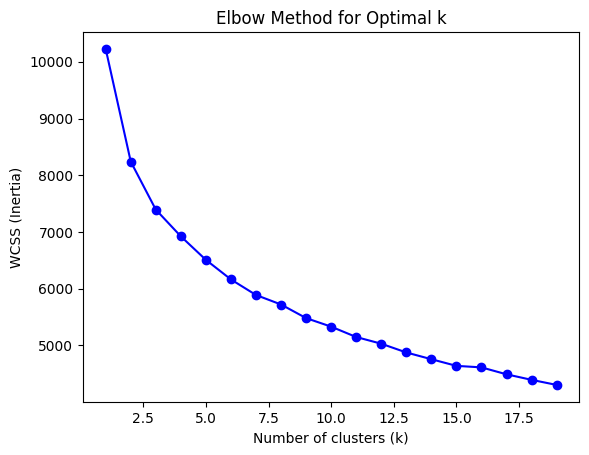

In [7]:
wcss = []
K = range(1, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED)
    kmeans.fit(df)
    inertia = kmeans.inertia_ # inertia_ = WCSS
    print(f"k={k}, inertia={inertia:.4f}")
    wcss.append(inertia)  

# Plot the elbow
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

Dengan menggunakan elbow method di atas, grafik cenderung kondisi yang terus menurun setelah nilai `k=2`. Dengan demikian, nilai `k` yang paling baik adalah pada `k=2`.

#### 2.1.1.2 Silhouette score

k=2, silhouette score=0.1847
k=3, silhouette score=0.1688
k=4, silhouette score=0.1375
k=5, silhouette score=0.1313
k=6, silhouette score=0.1417
k=7, silhouette score=0.1335
k=8, silhouette score=0.1223
k=9, silhouette score=0.1267
k=10, silhouette score=0.1234
k=11, silhouette score=0.1342
k=12, silhouette score=0.1351
k=13, silhouette score=0.1337
k=14, silhouette score=0.1365
k=15, silhouette score=0.1445
k=16, silhouette score=0.1317
k=17, silhouette score=0.1418
k=18, silhouette score=0.1366
k=19, silhouette score=0.1528


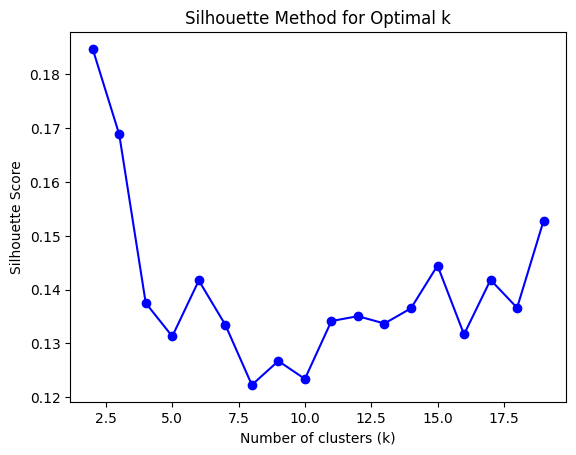

In [8]:
s_scores = []
K = range(2, 20)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=RANDOM_SEED)
    labels = kmeans.fit_predict(df)
    score = silhouette_score(df, labels)
    print(f"k={k}, silhouette score={score:.4f}")
    s_scores.append(score)
    
# Plot
plt.plot(K, s_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

Berdassarkan metode yang dilakukan dari elbow method, nilai k terbaik terletak pada `k=2`. Pada `k=2`, didapatkan nilai silhouette score tertinggi ($0.1847$)

### 2.1.2 Model training

Proses training dilakukan dengan memanfaatkan library dari library **Scikit-learn** pada modul `sklearn.cluster`. Untuk menggunakannya, maka bisa menambahkan parameter `n_clusters` dengan nilai `2` yang didapat dari proses penentuan `k` sebelumnya (elbow method dan juga silhouette score).

In [9]:
kmeans = KMeans(n_clusters=2, random_state=RANDOM_SEED)
kmeans_labels = kmeans.fit_predict(df)

kmeans_labels

array([0, 1, 1, ..., 1, 0, 0], dtype=int32)

### 2.1.3 Visualisasi

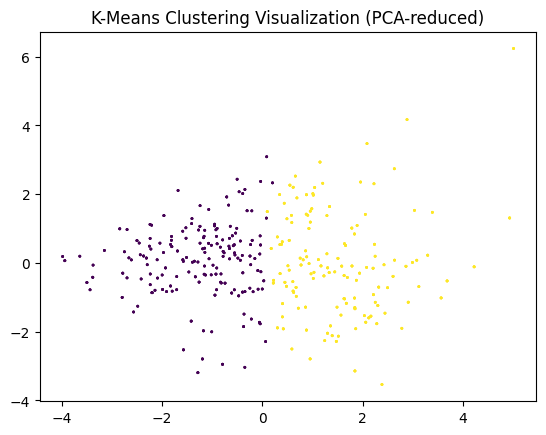

In [10]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(df)

plt.scatter(
    reduced[:, 0], 
    reduced[:, 1], 
    c=kmeans_labels, 
    cmap='viridis', 
    s=1
)
plt.title("K-Means Clustering Visualization (PCA-reduced)")
plt.show()

## 2.2 DBSCAN

### 2.2.1 Konfigurasi Awal DBSCAN

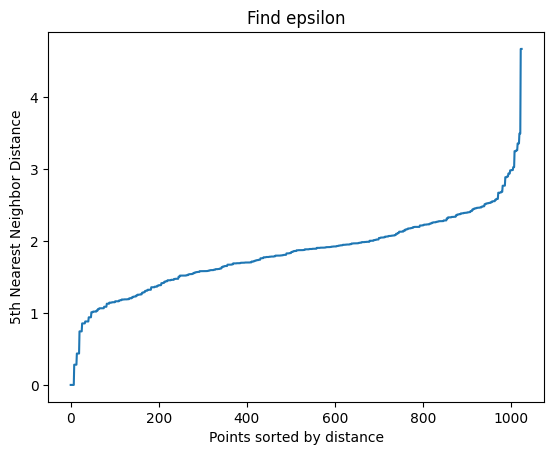

In [11]:
neigh = NearestNeighbors(n_neighbors=5)
nbrs = neigh.fit(df)
distances, indices = nbrs.kneighbors(df)

distances = np.sort(distances[:, 4])

# Plot
plt.plot(distances)
plt.ylabel("5th Nearest Neighbor Distance")
plt.xlabel("Points sorted by distance")
plt.title("Find epsilon")
plt.show()

### 2.2.2 Model training

In [12]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan_labels = dbscan.fit_predict(df)

dbscan_labels

array([ 0, -1, -1, ...,  0,  0,  2])

In [13]:
score = silhouette_score(df, dbscan_labels)
print("Silhouette Score (DBSCAN):", score)

Silhouette Score (DBSCAN): -0.10080887717235802


### 2.2.3 Visualisasi

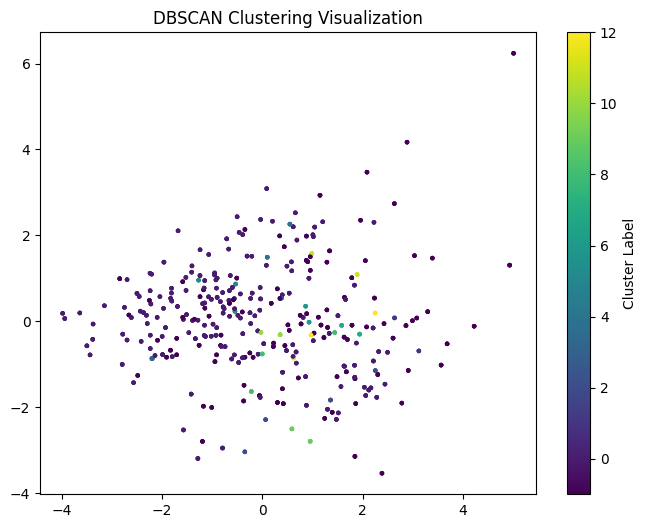

In [14]:
pca_2d = PCA(n_components=2)
reduced_2d = pca_2d.fit_transform(df)

# 2D Plot
plt.figure(figsize=(8, 6))
plt.scatter(
    reduced_2d[:, 0], reduced_2d[:, 1],
    c=dbscan_labels,
    cmap='viridis',
    s=5
)
plt.title("DBSCAN Clustering Visualization")
plt.colorbar(label='Cluster Label')
plt.show()

## 2.3 Perbandingan Hasil

In [15]:
sil_kmeans = silhouette_score(df, kmeans_labels)
dbi_kmeans = davies_bouldin_score(df, kmeans_labels)

sil_dbscan = silhouette_score(df, dbscan_labels) if len(set(dbscan_labels)) > 1 else None
dbi_dbscan = davies_bouldin_score(df, dbscan_labels) if len(set(dbscan_labels)) > 1 else None

print(f"K-Means  → Silhouette: {sil_kmeans:.3f}, DBI: {dbi_kmeans:.3f}")
print(f"DBSCAN   → Silhouette: {sil_dbscan}, DBI: {dbi_dbscan}")

K-Means  → Silhouette: 0.185, DBI: 1.969
DBSCAN   → Silhouette: -0.10080887717235802, DBI: 1.9131822947938804


# 3. Analisis

Berdasarkan hasil dari metode **K-Means**, diperoleh nilai **silhouette score sebesar 0.185**, yang mendekati nol. Hal ini menunjukkan bahwa memang terdapat klaster, namun batas antar klaster saling tumpang tindih secara signifikan, yang berarti pemisahan antar klaster masih lemah.

Untuk **Davies–Bouldin Index (DBI)**, metode K-Means memiliki nilai **1.969**, yang mengindikasikan bahwa pemisahan antara klaster yang berbeda masih kurang baik.

Sementara itu, pada metode **DBSCAN**, diperoleh **silhouette score sebesar -0.10**, yang bernilai negatif. Ini berarti banyak titik kemungkinan ditempatkan pada klaster yang salah atau klaster yang terbentuk tidak terstruktur dengan baik. Nilai **DBI untuk DBSCAN adalah 1.913**, yang mirip dengan K-Means, dan juga menunjukkan bahwa pemisahan antar klaster masih kurang baik.


# 4. ANN (Approximate Nearest Neighbor)

In [16]:
f = df.shape[1]  # number of features
index = AnnoyIndex(f, 'euclidean')  # or 'angular'

# Add each vector into the index
for i, vector in enumerate(df.values):
    index.add_item(i, vector)

# Build the forest
index.build(10)  # number of trees (higher = more accurate, slower)

True

In [17]:
query_index = 10
k = 5 

neighbors, distances = index.get_nns_by_item(
    query_index,
    k,
    include_distances=True
)

print("Query index:", query_index)
print("Nearest neighbors:", neighbors)
print("Distances:", distances)

Query index: 10
Nearest neighbors: [10, 401, 500, 648, 643]
Distances: [0.0, 0.0, 0.0, 0.0, 2.3375353813171387]


# 5. Kesimpulan

Berdasarkan serangkaian percobaan yang telah dilakukan menggunakan metode K-Means, DBSCAN, dan Approximate Nearest Neighbor (ANN) pada dataset Heart Disease, dapat disimpulkan bahwa metode K-Means memberikan hasil klasterisasi yang relatif lebih baik dibandingkan dengan DBSCAN. Hal ini ditunjukkan oleh nilai Silhouette Score sebesar $0.185$. Walaupun mendekati nol, nilai tersebut tetap menunjukkan adanya struktur klaster yang terbentuk, meskipun dengan batas antarklaster yang lemah.

Sebaliknya, metode DBSCAN memperoleh Silhouette Score negatif ($-0.10$). Nilai negatif ini menandakan adanya kesalahan penempatan titik dalam klaster atau terbentuknya klaster yang tidak terstruktur dengan baik. Meskipun demikian, nilai Davies–Bouldin Index ($1.913$) sedikit lebih baik daripada K-Means ($1.969$).

Sementara itu, hasil dari metode ANN menunjukkan bahwa titik dengan indeks 10 memiliki beberapa tetangga dengan jarak yang sangat kecil bahkan nol. Hal ini mengindikasikan adanya kemiripan fitur yang kuat di antara data tersebut. Namun, untuk memastikan apakah tetangga-tetangga tersebut berada dalam klaster yang sama, diperlukan pengecekan lebih lanjut terhadap label klaster hasil K-Means atau DBSCAN.

Secara keseluruhan, K-Means masih menjadi metode yang paling stabil dan konsisten dalam kasus ini. Sementara itu, DBSCAN dan ANN dapat berfungsi sebagai pembanding atau pendukung dalam analisis kemiripan data dan validasi struktur klaster.